In [4]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

import flotilla


flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'

# study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering', flotilla_dir=flotilla_dir)
study = flotilla.embark('singlecell_pnm_figure1_post_kmeans_outliers', flotilla_dir=flotilla_dir)

not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)
folder = 'figures/001_modality_calculation_bayesian'
! mkdir $folder

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2017-01-05 13:17:06	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure1_post_kmeans_outliers/datapackage.json
2017-01-05 13:17:06	Parsing datapackage to create a Study object
https://s3-us-west-2.amazonaws.com/flotilla-projects/ercc/ERCC_Controls.txt has not been downloaded before.
2017-01-05 13:17:21 	Initializing Study
2017-01-05 13:17:21 	Initializing Predictor configuration manager for Study
2017-01-05 13:17:21	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2017-01-05 13:17:21	Added ExtraTreesClassifier to default predictors
2017-01-05 13:17:21	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2017-01-05 13:17:21	Added ExtraTreesRegressor to default predictors
2017-01-05 13:17:21	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradie

Error loading species hg19 data: HTTP Error 404: Not Found

In [6]:
# study.plot_event("CDC42")

In [7]:
splicing_singles_no_outliers = study.splicing.singles.ix[not_outliers]
print splicing_singles_no_outliers.shape

(228, 19284)


## Estimate modalities

### Initialize the modality estimator

In [5]:
import anchor

bayesian = anchor.BayesianModalities()
# binned = anchor.BinnedModalities()
# monte_carlo = anchor.MonteCarloModalities()

In [6]:
# fig = estimator.violinplot(n=1e6)
# for ax in fig.axes:
#     ax.set(yticks=[0, 0.5, 1], xlabel='')
# fig.tight_layout()
# sns.despine()
# fig.savefig('{}/modality_estimator_parameterized_family.pdf'.format(folder))

## Calculate/Estimate modalities only on single cells, with no outliers

And at least 10 cells per splicing event, per celltype/phenotype

In [7]:
study.splicing.minimum_samples

10

In [8]:
print splicing_singles_no_outliers.shape
splicing_singles_no_outliers = splicing_singles_no_outliers.groupby(
    study.sample_id_to_phenotype).apply(lambda x: x.dropna(thresh=study.splicing.minimum_samples, axis=1))
print splicing_singles_no_outliers.shape

(181, 16360)
(181, 12894)


In [9]:
pkm_events = study.splicing.maybe_renamed_to_feature_id('PKM')

In [10]:
%time modality_assignments = splicing_singles_no_outliers.groupby(study.sample_id_to_phenotype).apply(bayesian.fit_predict)

CPU times: user 17min 37s, sys: 122 ms, total: 17min 38s
Wall time: 17min 39s


In [11]:
modality_assignments

,exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,exon:chr10:100195392-100195529:-@exon:chr10:100195029-100195171:-@exon:chr10:100193697-100193848:-,exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-,exon:chr10:101507014-101507147:+@exon:chr10:101510126-101510153:+@exon:chr10:101514286-101514391:+,exon:chr10:101507014-101507147:+@exon:chr10:101514286-101514391:+@exon:chr10:101515382-101515465:+,exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-@exon:chr10:101995424-101995521:-,exon:chr10:102003455-102003534:-@exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-,exon:chr10:102013178-102013296:-@exon:chr10:102010005-102010089:-@exon:chr10:102006552-102006692:-,exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,...,exon:chrY:15560897-15560946:-@exon:chrY:15526615-15526673:-@exon:chrY:15522873-15522993:-,exon:chrY:15591134-15591384:-@exon:chrY:15582001-15582109:-@exon:chrY:15560897-15560946:-,exon:chrY:21903204-21903374:-@exon:chrY:21901414-21901548:-@exon:chrY:21897507-21897636:-,exon:chrY:21903621-21903743:-@exon:chrY:21903204-21903374:-@exon:chrY:21901414-21901548:-,exon:chrY:22744476-22744579:+@exon:chrY:22746360-22746410:+@exon:chrY:22749910-22749991:+,exon:chrY:2709527-2709668:+@exon:chrY:2710206-2710283:+@exon:chrY:2712118-2712298:+,exon:chrY:2710206-2710283:+@exon:chrY:2712118-2712298:+@exon:chrY:2713687-2713784:+,exon:chrY:2712118-2712298:+@exon:chrY:2713687-2713784:+@exon:chrY:2722641-2722812:+,exon:chrY:2713687-2713784:+@exon:chrY:2722641-2722812:+@exon:chrY:2733129-2733286:+,exon:chrY:2722641-2722812:+@exon:chrY:2733129-2733286:+@exon:chrY:2734834-2734903:+
phenotype,,,,,,,,,,,,,,,,,,,,,
MN,NaN,NaN,included,bimodal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,included,included,included,included,included
NPC,NaN,NaN,included,bimodal,bimodal,NaN,bimodal,NaN,NaN,included,...,included,included,NaN,NaN,included,included,included,included,included,included
iPSC,bimodal,bimodal,included,included,bimodal,bimodal,included,included,bimodal,bimodal,...,included,bimodal,bimodal,bimodal,included,included,included,included,included,included


In [12]:
modalities_tidy = modality_assignments.stack().reset_index()
modalities_tidy = modalities_tidy.rename(columns={'level_1': 'event_id', 0: "modality",})
modalities_tidy.head()

,phenotype,event_id,modality
0,MN,exon:chr10:101165513-101165617:-@exon:chr10:10...,included
1,MN,exon:chr10:101480744-101480825:-@exon:chr10:10...,bimodal
2,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,included
3,MN,exon:chr10:102286732-102286831:-@exon:chr10:10...,included
4,MN,exon:chr10:102747070-102747240:-@exon:chr10:10...,bimodal


In [13]:
modalities_tidy.loc[modalities_tidy.event_id.isin(pkm_events)]

,phenotype,event_id,modality
1427,MN,exon:chr15:72499069-72499221:-@exon:chr15:7249...,included
1428,MN,exon:chr15:72499069-72499221:-@exon:chr15:7249...,included
1429,MN,exon:chr15:72499069-72499221:-@exon:chr15:7249...,bimodal
1430,MN,exon:chr15:72523457-72523547:-@exon:chr15:7251...,excluded
7701,NPC,exon:chr15:72499069-72499221:-@exon:chr15:7249...,included
7702,NPC,exon:chr15:72499069-72499221:-@exon:chr15:7249...,included
7703,NPC,exon:chr15:72499069-72499221:-@exon:chr15:7249...,excluded
7704,NPC,exon:chr15:72523457-72523547:-@exon:chr15:7251...,excluded
17178,iPSC,exon:chr15:72499069-72499221:-@exon:chr15:7249...,included
17179,iPSC,exon:chr15:72499069-72499221:-@exon:chr15:7249...,excluded


In [14]:
modalities_counts = modalities_tidy.groupby(['phenotype', 'modality']).count().reset_index()
modalities_counts = modalities_counts.rename(columns={'event_id': '# AS events'})
modalities_counts.head()

,phenotype,modality,# AS events
0,MN,bimodal,1316
1,MN,excluded,1175
2,MN,included,2995
3,MN,uncategorized,2
4,NPC,bimodal,2325


In [15]:
from anchor import MODALITY_ORDER, MODALITY_PALETTE, MODALITY_TO_COLOR

In [16]:
modalities_counts_2d = modalities_counts.pivot(index='phenotype', columns='modality', values='# AS events')
modalities_counts_2d = modalities_counts_2d.reindex(columns=MODALITY_ORDER, index=study.phenotype_order)
modalities_counts_2d = modalities_counts_2d.T
modalities_counts_2d

phenotype,iPSC,NPC,MN
modality,,,
excluded,2293,1732,1175
bimodal,3438,2325,1316
included,6105,4597,2995
middle,1,NaN,NaN
uncategorized,34,4,2


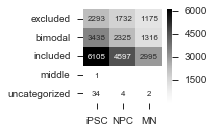

In [24]:
fig, ax= plt.subplots(figsize=(3, 2))
mask = modalities_counts_2d.isnull()
sns.heatmap(modalities_counts_2d, annot=True, mask=mask, fmt='g', annot_kws=dict(size=8), cmap='Greys')
ax.set(xlabel='', ylabel='')
fig.tight_layout()
fig.savefig('{}/modalities_counts_heatmap.pdf'.format(folder))

In [18]:
modalities_counts['percentage'] = 100*modalities_counts.groupby('phenotype')['# AS events'].apply(lambda x: x/x.sum())
modalities_counts

,phenotype,modality,# AS events,percentage
0,MN,bimodal,1316,23.979592
1,MN,excluded,1175,21.410350
2,MN,included,2995,54.573615
3,MN,uncategorized,2,0.036443
4,NPC,bimodal,2325,26.853777
5,NPC,excluded,1732,20.004620
6,NPC,included,4597,53.095403
7,NPC,uncategorized,4,0.046200
8,iPSC,bimodal,3438,28.961334
9,iPSC,excluded,2293,19.315980


/home/obotvinnik/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:2848: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)


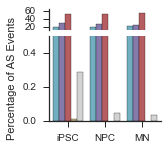

In [19]:
sns.set(style='ticks')
fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(2, 2), gridspec_kw=dict(hspace=0.1, height_ratios=[0.2, 0.8]))

ax = axes[0]
sns.barplot(x='phenotype', hue='modality', y='percentage', data=modalities_counts, ax=ax,
            hue_order=MODALITY_ORDER, palette=MODALITY_PALETTE, x_order=study.phenotype_order)
ax.legend_.set_visible(False)
ax.locator_params('y', nbins=4)
sns.despine(ax=ax, bottom=True)
ax.tick_params(axis='x', bottom='off')
ax.set(xticks=[], xlabel='', ylim=(10, 65), ylabel='') #yticks=[10, 50, ])

ax = axes[1]
sns.barplot(x='phenotype', hue='modality', y='percentage', data=modalities_counts, ax=ax,
           hue_order=MODALITY_ORDER, palette=MODALITY_PALETTE, x_order=study.phenotype_order)
ax.set(ylim=(0, 0.5), ylabel='Percentage of AS Events', 
       xlabel='')
ax.legend_.set_visible(False)
ax.locator_params('y', nbins=4)
sns.despine(ax=ax)
# fig.tight_layout()
fig.savefig('{}/modalities_barplot.pdf'.format(folder))

In [20]:
study.supplemental.modalities_tidy = modalities_tidy

In [21]:
modalities_tidy.groupby(['phenotype', 'modality']).size()

phenotype  modality     
MN         bimodal          1316
           excluded         1175
           included         2995
           uncategorized       2
NPC        bimodal          2325
           excluded         1732
           included         4597
           uncategorized       4
iPSC       bimodal          3438
           excluded         2293
           included         6105
           middle              1
           uncategorized      34
dtype: int64

In [22]:
flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'
study.save('singlecell_pnm_figure2_modalities_bayesian', flotilla_dir=flotilla_dir)

Wrote datapackage to /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities_bayesian/datapackage.json
